In [5]:
import cfinversion
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import IPython.display
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tol_colors import tol_cmap, tol_cset
plt.rcParams['svg.fonttype'] = 'none'
IPython.display.set_matplotlib_formats = set_matplotlib_formats
set_matplotlib_formats('svg')


In [7]:
from cfinversion.continuous import *
def FitMethods(cf, N = 1000, delta=1e-1, trunc = 10):
  methods = {
            'Bohman A' : BohmanA(N=N,delta=delta),
            'Bohman B' : BohmanB(N=N,delta=delta),
            'Bohman C' : BohmanC(N=N,delta=delta),
            'Bohman D' : BohmanD(N=N,delta=delta), 
            'Bohman E' : BohmanE(N=N,delta=delta, K = 16),
            'Witkowsky GP'  : NaiveGPInverter(N=N,delta=delta),
            'Witkowsky FFT' : FFTInverter(N=N, A = -trunc, B = trunc)
            }
  
  for method in methods:
    methods[method].fit(cf)
  return methods

In [8]:
from cfinversion.tools import lre
from cfinversion.distributions import *

In [158]:
x_sym = np.linspace(-2, 2, 1000)
x_pos = np.linspace(0, 1, 1000)
cases = [(Norm(0, 1), x_sym, 'Normal'),
         (Laplace(0, 1), x_sym, 'Laplace'),
         (Uniform(0, 1), x_pos, 'Uniform'),
         (UniformSquared(0, 1), x_pos, 'UniformSquared')]
stat = {}
results_save = {}
N = [int(10**k) for k in np.linspace(1, 4, 15)]
for i in range(4):
  dist, x, dist_name = cases[i]
  stat[dist_name] = {}
  results_save[dist_name] = {}
  for n in N:
    results = FitMethods(dist.chr, n)
    results_save[dist_name][n] = results
    stat[dist_name][n] = {}
    #stat[dist_name]['lre_errors_pdf'] = []
    #stat[dist_name]['lre_errors_cdf'] = []
    stat[dist_name][n]['sup_error_pdf'] = {}
    stat[dist_name][n]['sup_error_cdf'] = {} 
    stat[dist_name][n]['mae_pdf'] = {}
    stat[dist_name][n]['mae_cdf'] = {}
    stat[dist_name][n]['mse_pdf'] = {}
    stat[dist_name][n]['mse_cdf'] = {}
    stat[dist_name][n]['mae_std_pdf'] = {}
    stat[dist_name][n]['mae_std_cdf'] = {}
    stat[dist_name][n]['mse_std_pdf'] = {}
    stat[dist_name][n]['mse_std_cdf'] = {}
    for m, estim in results.items():
      errors_cdf = dist.cdf(x) - np.real(estim.cdf(x))
      errors_pdf = dist.pdf(x) - np.real(estim.pdf(x))
      # stat[dist_name]['lre_errors_pdf'] += [lre(dist.pdf(x), estim.pdf(x))]
      # stat[dist_name]['lre_errors_cdf'] += [lre(dist.cdf(x), estim.cdf(x))]
      stat[dist_name][n]['sup_error_pdf'][m] = np.max(np.abs(errors_pdf))
      stat[dist_name][n]['sup_error_cdf'][m] = np.max(np.abs(errors_cdf))
      stat[dist_name][n]['mae_pdf'][m] = np.mean(np.abs(errors_pdf))
      stat[dist_name][n]['mae_cdf'][m] = np.mean(np.abs(errors_cdf))
      stat[dist_name][n]['mse_pdf'][m] = np.mean(np.abs(errors_pdf**2))
      stat[dist_name][n]['mse_cdf'][m] = np.mean(np.abs(errors_cdf**2))
      stat[dist_name][n]['mae_std_pdf'][m] = np.std(np.abs(errors_pdf))
      stat[dist_name][n]['mae_std_cdf'][m] = np.std(np.abs(errors_cdf))
      stat[dist_name][n]['mse_std_pdf'][m] = np.std(errors_pdf**2)
      stat[dist_name][n]['mse_std_cdf'][m] = np.std(errors_cdf**2)

In [159]:
methods = list(results.keys())

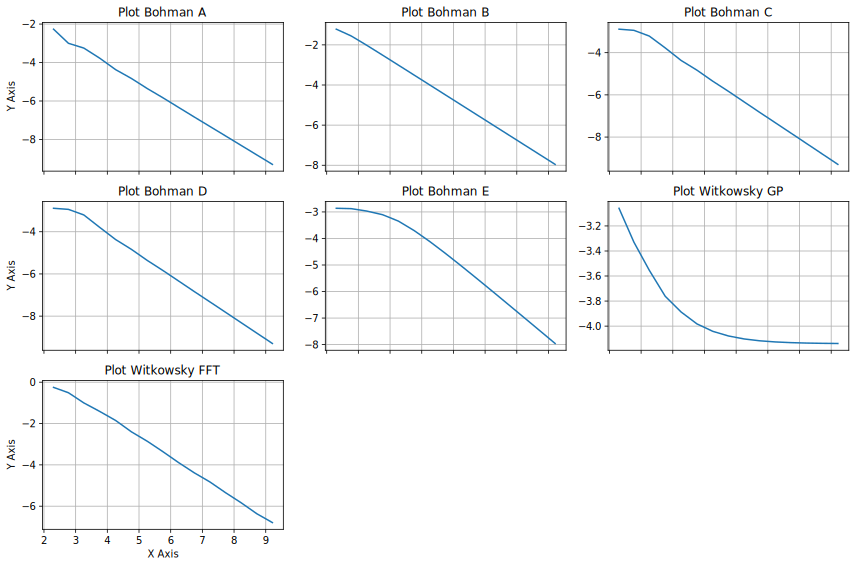

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of subplots (9 positions, we'll use 7)
fig, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

# Common x and y tick values
# xticks = np.arange(0, 11, 2)  # 0-10 in steps of 2
# yticks = np.arange(-1, 1.1, 0.5)  # -1 to 1 in steps of 0.5

# Generate and plot data for each of the 7 axes
for i in range(7):
    ax = axes_flat[i]
    
    # Generate sample data (replace with your actual data)
    ax.plot(np.log(np.array(N)), np.log(np.array([stat['Uniform'][n]['sup_error_cdf'][methods[i]] for n in N])), label = methods[i])
    ax.set_title(f'Plot {methods[i]}')
    
    # Set common ticks
    # ax.set_xticks(xticks)
    # ax.set_yticks(yticks)
    
    # # Set common limits
    # ax.set_xlim(xticks[0], xticks[-1])
    # ax.set_ylim(yticks[0], yticks[-1])
    
    # Only show labels for bottom row and leftmost column
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    if row == 2:  # Bottom row
        ax.set_xlabel('X Axis')
    if col == 0:  # Leftmost column
        ax.set_ylabel('Y Axis')
    ax.grid()
# Turn off unused axes (positions 7 and 8)
for ax in axes_flat[7:]:
    ax.axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()